In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load the Excel file
excel_data = pd.ExcelFile("data/assets V1.xlsx")

# Initialize an empty DataFrame for merging
merged_df = None

# Iterate through all sheet names
for sheet_name in excel_data.sheet_names:
    # Read the sheet into a DataFrame
    df = excel_data.parse(sheet_name)

    if '时间' in df.columns:
        # Convert '时间/日期' to datetime format
        df['日期'] = pd.to_datetime(df['时间'], errors='coerce')
    elif '日期' in df.columns:
        df['日期'] = pd.to_datetime(df['日期'], errors='coerce')
    else:
        # Skip sheets without '时间' or '日期' columns
        continue

    if '收盘' in df.columns:
        # Filter rows with dates after 2019/01/01
        df = df[(df['日期'] >= pd.Timestamp('2019-04-01')) & (df['日期'] < pd.Timestamp('2025-4-12'))]
        
        # Select relevant columns
        df = df[['日期', '收盘']].rename(columns={'收盘': sheet_name})

        # Merge with the main DataFrame on '日期'
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='日期', how='outer')

In [3]:
merged_df

,日期,上证综指ETF,南方深证成份ETF,易方达创业板ETF,华泰柏瑞沪深300ETF,南方中证500ETF,南方中证1000ETF,易方达中证红利ETF,海富通上证城投债ETF,平安中证5-10年国债活跃券ETF,平安中债债利差因子ETF,鹏华中证5年地债ETF,博时可转债ETF,沪金主连,螺纹钢主连,沪铜主连,豆粕主连,PTA主连,华泰柏瑞上证红利ETF,十债主连
0,2019-04-01,0.579,1.140,1.694,3.627,5.215,1.985,NaN,7.844,91.393,88.076,NaN,NaN,282.10,3806,49460,2495,6542,2.214,97.450
1,2019-04-02,0.582,1.123,1.682,3.620,5.211,1.996,NaN,7.843,91.393,87.800,NaN,NaN,282.15,3838,49270,2541,6428,2.212,97.255
2,2019-04-03,0.589,1.131,1.700,3.673,5.273,2.012,NaN,7.843,91.283,87.601,NaN,NaN,282.90,3587,49510,2542,6392,2.244,96.750
3,2019-04-04,0.597,1.133,1.701,3.720,5.323,2.023,NaN,7.845,91.073,87.950,NaN,NaN,282.95,3594,49520,2641,6540,2.279,96.460
4,2019-04-08,0.601,1.128,1.665,3.694,5.261,2.004,NaN,7.833,90.798,87.610,NaN,NaN,284.15,3730,49260,2639,6576,2.294,96.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2025-04-07,0.755,1.120,1.775,3.695,5.280,2.234,1.272,10.259,117.324,105.803,115.695,11.466,718.18,3083,73640,3056,4550,2.938,109.180
1459,2025-04-08,0.765,1.129,1.804,3.730,5.313,2.219,1.302,10.242,117.110,105.621,115.494,11.587,719.22,3101,73360,3164,4296,3.003,108.900
1460,2025-04-09,0.772,1.143,1.823,3.766,5.428,2.258,1.306,10.234,117.024,105.625,115.563,11.725,728.14,3088,72130,3119,4110,3.007,109.045
1461,2025-04-10,0.780,1.170,1.863,3.829,5.535,2.313,1.318,10.239,117.256,105.615,115.589,11.820,744.48,3139,75300,3074,4350,3.038,109.035


In [4]:
merged_df.isna().sum()

日期                     0
上证综指ETF                1
南方深证成份ETF              0
易方达创业板ETF              1
华泰柏瑞沪深300ETF           0
南方中证500ETF             0
南方中证1000ETF            1
易方达中证红利ETF           178
海富通上证城投债ETF            0
平安中证5-10年国债活跃券ETF     96
平安中债债利差因子ETF          45
鹏华中证5年地债ETF          153
博时可转债ETF             247
沪金主连                   0
螺纹钢主连                  0
沪铜主连                   0
豆粕主连                   0
PTA主连                  0
华泰柏瑞上证红利ETF            0
十债主连                   0
dtype: int64

In [5]:
merged_df[merged_df['平安中证5-10年国债活跃券ETF'].isna()]

,日期,上证综指ETF,南方深证成份ETF,易方达创业板ETF,华泰柏瑞沪深300ETF,南方中证500ETF,南方中证1000ETF,易方达中证红利ETF,海富通上证城投债ETF,平安中证5-10年国债活跃券ETF,平安中债债利差因子ETF,鹏华中证5年地债ETF,博时可转债ETF,沪金主连,螺纹钢主连,沪铜主连,豆粕主连,PTA主连,华泰柏瑞上证红利ETF,十债主连
23,2019-05-08,0.519,0.984,1.419,3.317,4.429,1.703,NaN,7.871,NaN,87.400,NaN,NaN,283.95,3731,47840,2608,5882,1.959,96.905
37,2019-05-28,0.522,0.977,1.432,3.308,4.450,1.727,NaN,7.932,NaN,87.818,NaN,NaN,291.00,3845,47130,2867,5448,1.933,96.540
47,2019-06-12,0.529,0.981,1.412,3.357,4.383,1.700,NaN,7.948,NaN,87.400,NaN,NaN,302.60,3776,46480,2863,5158,1.959,97.130
48,2019-06-13,0.530,0.980,1.422,3.350,4.398,1.711,NaN,7.946,NaN,87.400,NaN,NaN,303.20,3792,46270,2917,5224,1.950,97.340
52,2019-06-19,0.535,0.980,1.417,3.393,4.374,1.695,NaN,7.941,NaN,87.531,NaN,NaN,304.30,3770,46840,2884,5574,1.956,97.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2022-07-21,0.773,1.454,2.670,4.153,6.153,2.794,1.089,9.338,NaN,99.050,101.820,11.731,370.32,3831,56180,3820,5502,2.471,100.830
806,2022-07-26,0.773,1.445,2.634,4.167,6.110,2.781,1.103,9.358,NaN,98.970,102.190,11.719,377.46,3888,58890,3898,5890,2.501,100.945
812,2022-08-03,0.740,1.401,2.553,3.989,5.947,2.731,1.055,9.366,NaN,99.090,102.370,11.758,387.30,4063,59780,3970,5876,2.406,101.375
813,2022-08-04,0.746,1.411,2.565,4.020,5.968,2.745,1.058,9.370,NaN,99.010,102.362,11.772,387.90,3980,58750,3946,5744,2.410,101.305


In [6]:
merged_df[merged_df['平安中债债利差因子ETF'].isna()]

,日期,上证综指ETF,南方深证成份ETF,易方达创业板ETF,华泰柏瑞沪深300ETF,南方中证500ETF,南方中证1000ETF,易方达中证红利ETF,海富通上证城投债ETF,平安中证5-10年国债活跃券ETF,平安中债债利差因子ETF,鹏华中证5年地债ETF,博时可转债ETF,沪金主连,螺纹钢主连,沪铜主连,豆粕主连,PTA主连,华泰柏瑞上证红利ETF,十债主连
33,2019-05-22,0.520,0.987,1.427,3.300,4.476,1.741,NaN,7.917,91.123,NaN,NaN,NaN,288.90,3910,47160,2775,5528,1.933,96.570
55,2019-06-24,0.555,1.007,1.460,3.514,4.529,1.752,NaN,7.928,91.588,NaN,NaN,NaN,315.80,3904,46750,2912,5690,2.012,97.310
72,2019-07-17,0.542,1.026,1.492,3.505,4.453,1.725,NaN,7.963,92.138,NaN,NaN,NaN,315.80,4052,46860,2828,5894,1.995,98.085
73,2019-07-18,0.537,1.010,1.470,3.480,4.387,1.697,NaN,7.964,92.128,NaN,NaN,NaN,319.10,3968,46780,2832,6036,1.969,98.270
75,2019-07-22,0.544,1.015,1.461,3.490,4.328,1.673,NaN,7.965,NaN,NaN,NaN,NaN,320.65,3948,47410,2797,5596,1.965,98.375
76,2019-07-23,0.550,1.015,1.481,3.499,4.361,1.708,NaN,7.970,92.308,NaN,NaN,NaN,318.70,3941,47300,2814,5504,1.976,98.380
87,2019-08-07,0.519,0.975,1.447,3.330,4.179,1.634,NaN,8.021,93.023,NaN,NaN,NaN,341.80,3711,45930,2887,5148,1.870,99.135
162,2019-11-28,0.565,1.060,1.611,3.588,4.441,1.758,NaN,8.011,93.474,NaN,91.686,NaN,332.05,3618,47350,2754,4726,1.968,98.015
195,2020-01-15,0.611,1.210,1.847,3.872,5.049,2.034,0.767,8.199,94.374,NaN,92.860,NaN,347.54,3537,49260,2693,4876,2.169,98.525
198,2020-01-20,0.614,1.228,1.905,3.901,5.114,2.056,0.763,8.198,94.524,NaN,92.831,NaN,347.94,3605,49100,2681,4926,2.146,98.915


In [7]:
# Fill NaN values using linear interpolation
merged_df.interpolate(method='linear', inplace=True)

In [8]:
# Calculate log returns for each asset
log_returns = merged_df.set_index('日期').apply(lambda x: np.log(x / x.shift(1)))
log_returns.fillna(0,inplace=True)

In [9]:
log_returns

,上证综指ETF,南方深证成份ETF,易方达创业板ETF,华泰柏瑞沪深300ETF,南方中证500ETF,南方中证1000ETF,易方达中证红利ETF,海富通上证城投债ETF,平安中证5-10年国债活跃券ETF,平安中债债利差因子ETF,鹏华中证5年地债ETF,博时可转债ETF,沪金主连,螺纹钢主连,沪铜主连,豆粕主连,PTA主连,华泰柏瑞上证红利ETF,十债主连
日期,,,,,,,,,,,,,,,,,,,
2019-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-02,0.005168,-0.015025,-0.007109,-0.001932,-0.000767,0.005526,0.000000,-0.000127,0.000000,-0.003139,0.000000,0.000000,0.000177,0.008373,-0.003849,0.018269,-0.017579,-0.000904,-0.002003
2019-04-03,0.011956,0.007099,0.010645,0.014535,0.011828,0.007984,0.000000,0.000000,-0.001204,-0.002269,0.000000,0.000000,0.002655,-0.067635,0.004859,0.000393,-0.005616,0.014363,-0.005206
2019-04-04,0.013491,0.001767,0.000588,0.012715,0.009438,0.005452,0.000000,0.000255,-0.002303,0.003976,0.000000,0.000000,0.000177,0.001950,0.000202,0.038206,0.022890,0.015477,-0.003002
2019-04-08,0.006678,-0.004423,-0.021391,-0.007014,-0.011716,-0.009436,0.000000,-0.001531,-0.003024,-0.003873,0.000000,0.000000,0.004232,0.037142,-0.005264,-0.000758,0.005489,0.006560,0.002278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,-0.076470,-0.103394,-0.132756,-0.069011,-0.101147,-0.105271,-0.066894,0.002440,0.003723,0.002460,0.002605,-0.042683,-0.028632,-0.025934,-0.068486,0.064539,-0.053905,-0.059142,0.005557
2025-04-08,0.013158,0.008004,0.016206,0.009428,0.006231,-0.006737,0.023311,-0.001658,-0.001826,-0.001722,-0.001739,0.010498,0.001447,0.005821,-0.003810,0.034730,-0.057443,0.021883,-0.002568
2025-04-09,0.009109,0.012324,0.010477,0.009605,0.021414,0.017423,0.003067,-0.000781,-0.000735,0.000038,0.000597,0.011840,0.012326,-0.004201,-0.016909,-0.014325,-0.044261,0.001331,0.001331


In [10]:
# Compute the correlation matrix
correlation_matrix = log_returns.corr()
correlation_matrix

,上证综指ETF,南方深证成份ETF,易方达创业板ETF,华泰柏瑞沪深300ETF,南方中证500ETF,南方中证1000ETF,易方达中证红利ETF,海富通上证城投债ETF,平安中证5-10年国债活跃券ETF,平安中债债利差因子ETF,鹏华中证5年地债ETF,博时可转债ETF,沪金主连,螺纹钢主连,沪铜主连,豆粕主连,PTA主连,华泰柏瑞上证红利ETF,十债主连
上证综指ETF,1.000000,0.847203,0.779645,0.930890,0.866474,0.811178,0.776673,-0.036654,-0.238759,-0.019226,-0.083422,0.673864,0.036257,0.283805,0.358083,0.073962,0.248355,0.772850,-0.268595
南方深证成份ETF,0.847203,1.000000,0.889063,0.879656,0.880015,0.853052,0.586188,-0.077367,-0.215475,-0.045589,-0.087228,0.638338,0.016764,0.258936,0.277337,0.025781,0.201103,0.549458,-0.231004
易方达创业板ETF,0.779645,0.889063,1.000000,0.836478,0.841924,0.830240,0.495410,-0.082870,-0.191922,-0.053607,-0.072884,0.621423,0.022790,0.211603,0.214111,0.013393,0.170427,0.419918,-0.186742
华泰柏瑞沪深300ETF,0.930890,0.879656,0.836478,1.000000,0.843231,0.770092,0.703011,-0.041656,-0.237859,-0.025247,-0.075610,0.654758,0.028258,0.272937,0.331446,0.071244,0.234924,0.671843,-0.258843
南方中证500ETF,0.866474,0.880015,0.841924,0.843231,1.000000,0.951436,0.683524,-0.070012,-0.246641,-0.046905,-0.089053,0.706244,0.040260,0.282753,0.327204,0.055629,0.214973,0.642750,-0.243039
南方中证1000ETF,0.811178,0.853052,0.830240,0.770092,0.951436,1.000000,0.621775,-0.062558,-0.230252,-0.043968,-0.091348,0.696704,0.035462,0.243298,0.289217,0.036659,0.185688,0.561717,-0.215823
易方达中证红利ETF,0.776673,0.586188,0.495410,0.703011,0.683524,0.621775,1.000000,0.002311,-0.207121,-0.010169,-0.081650,0.630409,0.051617,0.304102,0.381204,0.095206,0.218280,0.897679,-0.240484
海富通上证城投债ETF,-0.036654,-0.077367,-0.082870,-0.041656,-0.070012,-0.062558,0.002311,1.000000,0.226245,0.151137,0.132468,0.020602,0.031114,-0.086345,-0.045142,0.029220,-0.010482,0.016946,0.162620
平安中证5-10年国债活跃券ETF,-0.238759,-0.215475,-0.191922,-0.237859,-0.246641,-0.230252,-0.207121,0.226245,1.000000,0.177792,0.282581,-0.100262,0.101032,-0.117749,-0.134101,-0.023269,-0.089710,-0.206101,0.430121
平安中债债利差因子ETF,-0.019226,-0.045589,-0.053607,-0.025247,-0.046905,-0.043968,-0.010169,0.151137,0.177792,1.000000,0.062022,0.039535,0.061805,-0.046210,-0.012823,0.027357,0.009896,0.014536,0.126431


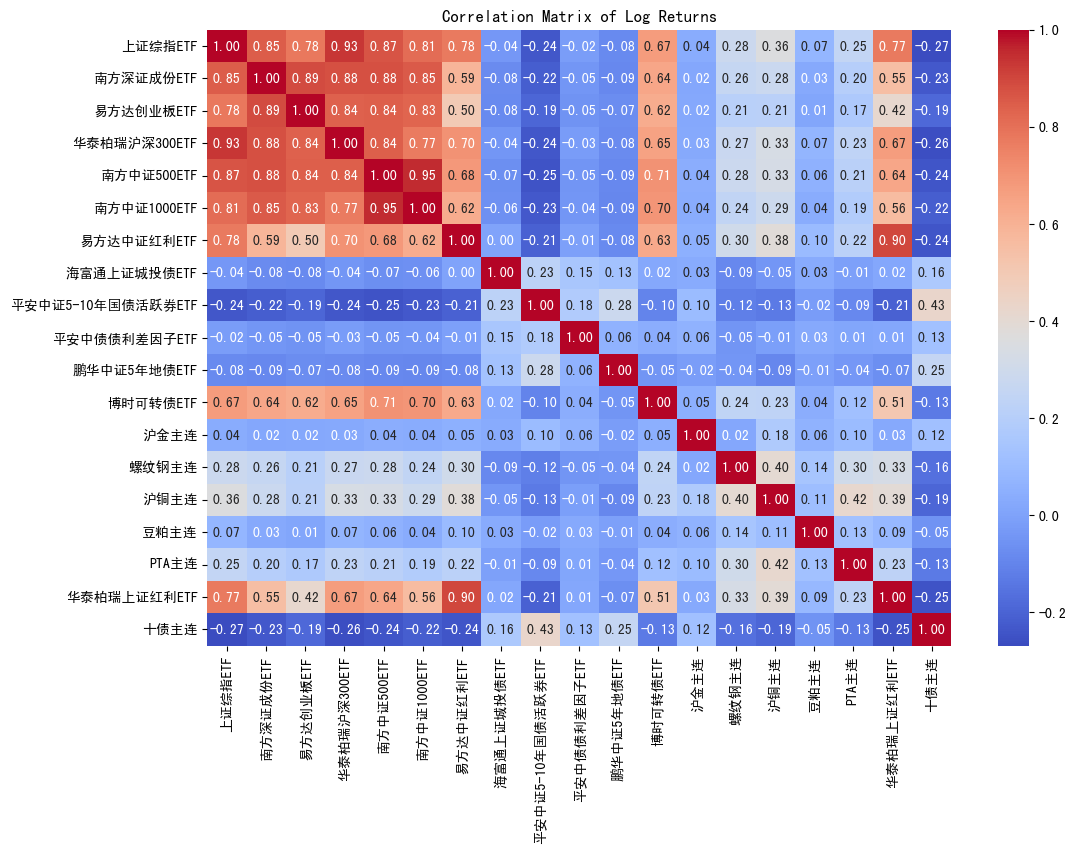

In [11]:
# Visualize the correlation matrix
plt.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Log Returns')
plt.show()

In [12]:
merged_df.set_index('日期', inplace=True)

# Compute the correlation matrix
correlation_matrix = merged_df.corr()
correlation_matrix

,上证综指ETF,南方深证成份ETF,易方达创业板ETF,华泰柏瑞沪深300ETF,南方中证500ETF,南方中证1000ETF,易方达中证红利ETF,海富通上证城投债ETF,平安中证5-10年国债活跃券ETF,平安中债债利差因子ETF,鹏华中证5年地债ETF,博时可转债ETF,沪金主连,螺纹钢主连,沪铜主连,豆粕主连,PTA主连,华泰柏瑞上证红利ETF,十债主连
上证综指ETF,1.000000,0.680981,0.688627,0.629295,0.853754,0.824226,0.601239,0.550795,0.515124,0.659467,0.313372,0.557739,0.437754,0.400029,0.764234,0.465924,0.110791,0.614428,0.295980
南方深证成份ETF,0.680981,1.000000,0.986112,0.959981,0.894951,0.844486,-0.278890,-0.184938,-0.204258,-0.036054,-0.534504,-0.033348,-0.231770,0.696425,0.194583,0.307099,-0.302609,-0.127721,-0.347730
易方达创业板ETF,0.688627,0.986112,1.000000,0.919720,0.906667,0.869011,-0.245807,-0.123855,-0.146218,0.021831,-0.490690,0.009539,-0.208747,0.708969,0.240041,0.343938,-0.251329,-0.090669,-0.286816
华泰柏瑞沪深300ETF,0.629295,0.959981,0.919720,1.000000,0.786780,0.699043,-0.261444,-0.255830,-0.254731,-0.100865,-0.516698,-0.137341,-0.206915,0.658857,0.154263,0.162808,-0.373635,-0.160445,-0.375869
南方中证500ETF,0.853754,0.894951,0.906667,0.786780,1.000000,0.980870,0.097670,0.151203,0.116790,0.272496,-0.183307,0.371929,0.020441,0.589212,0.448742,0.448256,-0.051938,0.222292,-0.065831
南方中证1000ETF,0.824226,0.844486,0.869011,0.699043,0.980870,1.000000,0.105546,0.191196,0.144262,0.296954,-0.157500,0.457426,0.013576,0.544752,0.430417,0.516536,-0.003634,0.225246,-0.041452
易方达中证红利ETF,0.601239,-0.278890,-0.245807,-0.261444,0.097670,0.105546,1.000000,0.907507,0.855151,0.927215,0.876807,0.707934,0.713807,-0.114953,0.888110,0.249959,0.672134,0.976517,0.670203
海富通上证城投债ETF,0.550795,-0.184938,-0.123855,-0.255830,0.151203,0.191196,0.907507,1.000000,0.979557,0.979604,0.982950,0.579110,0.860961,-0.232142,0.818465,0.314429,0.452537,0.934499,0.875353
平安中证5-10年国债活跃券ETF,0.515124,-0.204258,-0.146218,-0.254731,0.116790,0.144262,0.855151,0.979557,1.000000,0.965563,0.993137,0.530011,0.923666,-0.300579,0.779571,0.172531,0.342265,0.909514,0.941782
平安中债债利差因子ETF,0.659467,-0.036054,0.021831,-0.100865,0.272496,0.296954,0.927215,0.979604,0.965563,1.000000,0.964440,0.584584,0.856082,-0.119903,0.864465,0.308711,0.383040,0.923321,0.852037


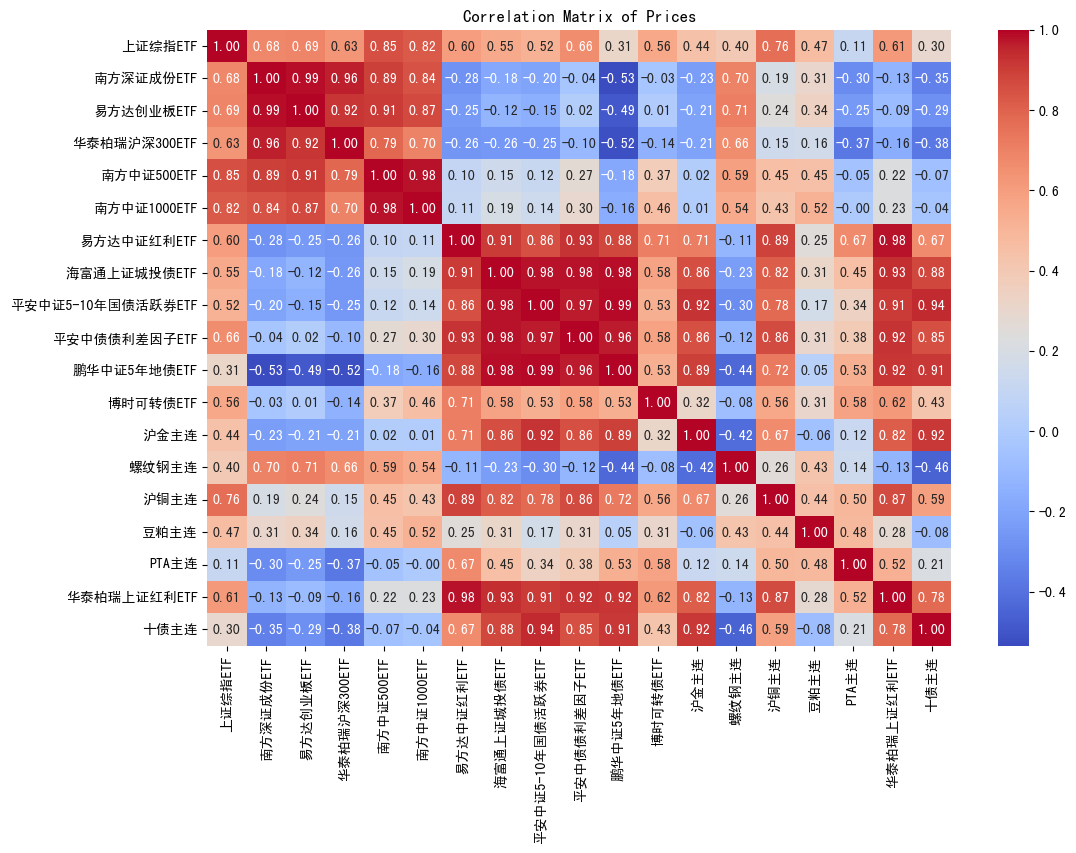

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Prices')
plt.show()

沪深300，中证红利，中证1000，中证5-10年国债，中债债利差因子，上证城投债，沪金，沪铜，豆粕，PTA

In [15]:
df = merged_df[['华泰柏瑞沪深300ETF', '南方中证1000ETF', '华泰柏瑞上证红利ETF', '海富通上证城投债ETF', '平安中证5-10年国债活跃券ETF', '平安中债债利差因子ETF', '沪金主连', '十债主连']]

In [16]:
df.to_csv('data/assets V2.csv', index=True)